In [1]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

In [2]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


First hand look of the top 5 records indicate that several attributes have unknown values which should be possibly handled before model development

In [3]:
# Checking the count of records
df.shape

(209593, 37)

In [4]:
# Checking the datatype of each attribute of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Of all the 209593 records with 36 columns\variable data, 13 columns (label,last_rech_amt_ma ,cnt_ma_rech30,cnt_da_rech90 ,fr_ma_rech90 ,sumamnt_ma_rech90,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans90,maxamnt_loans90  and previous) are continious\numbers and the rest are categorical in nature.

In [5]:
# Checking the presence of missing values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
# Check if there are any null values in data set
df.isnull().values.any()

False

There seemed to be no Null values in the data

In [7]:
df.drop(columns=['Unnamed: 0','pdate','msisdn'],axis=1,inplace=True)
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW


In [8]:
le=LabelEncoder()
df['pcircle']=le.fit_transform(df['pcircle'])

In [9]:
# Quick 5 point summary of the data columns transposed to rows to give a neat look.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


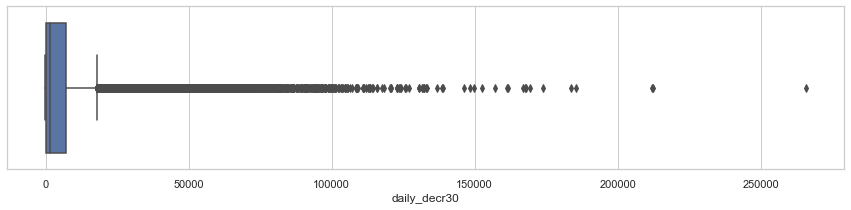

In [10]:
#  Checking the presence of outliers --> Age Attribute
sns.set(style="whitegrid");plt.figure(figsize=(15,3))
sns.boxplot(df['daily_decr30'])

The distribution of age attribute semmed to be right skewed and there are outliers.

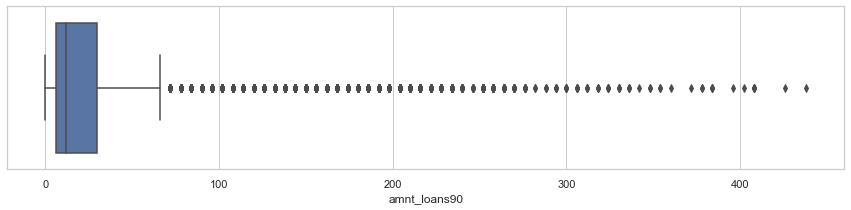

In [11]:
sns.set(style="whitegrid");plt.figure(figsize=(15,3))
sns.boxplot(df['amnt_loans90'])


The distribution of age attribute semmed to be right skewed and there are outliers.

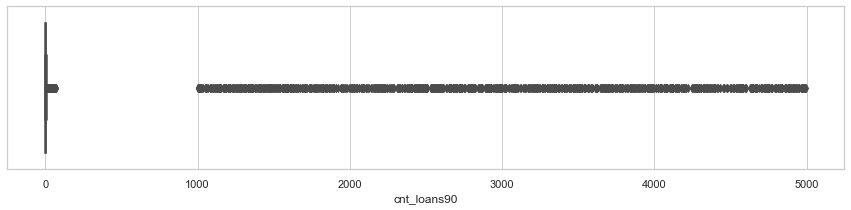

In [12]:
sns.set(style="whitegrid");plt.figure(figsize=(15,3))
sns.boxplot(df['cnt_loans90'])

The skewness of the pdays attribute was not inferable based on the plot however, there are outliers.

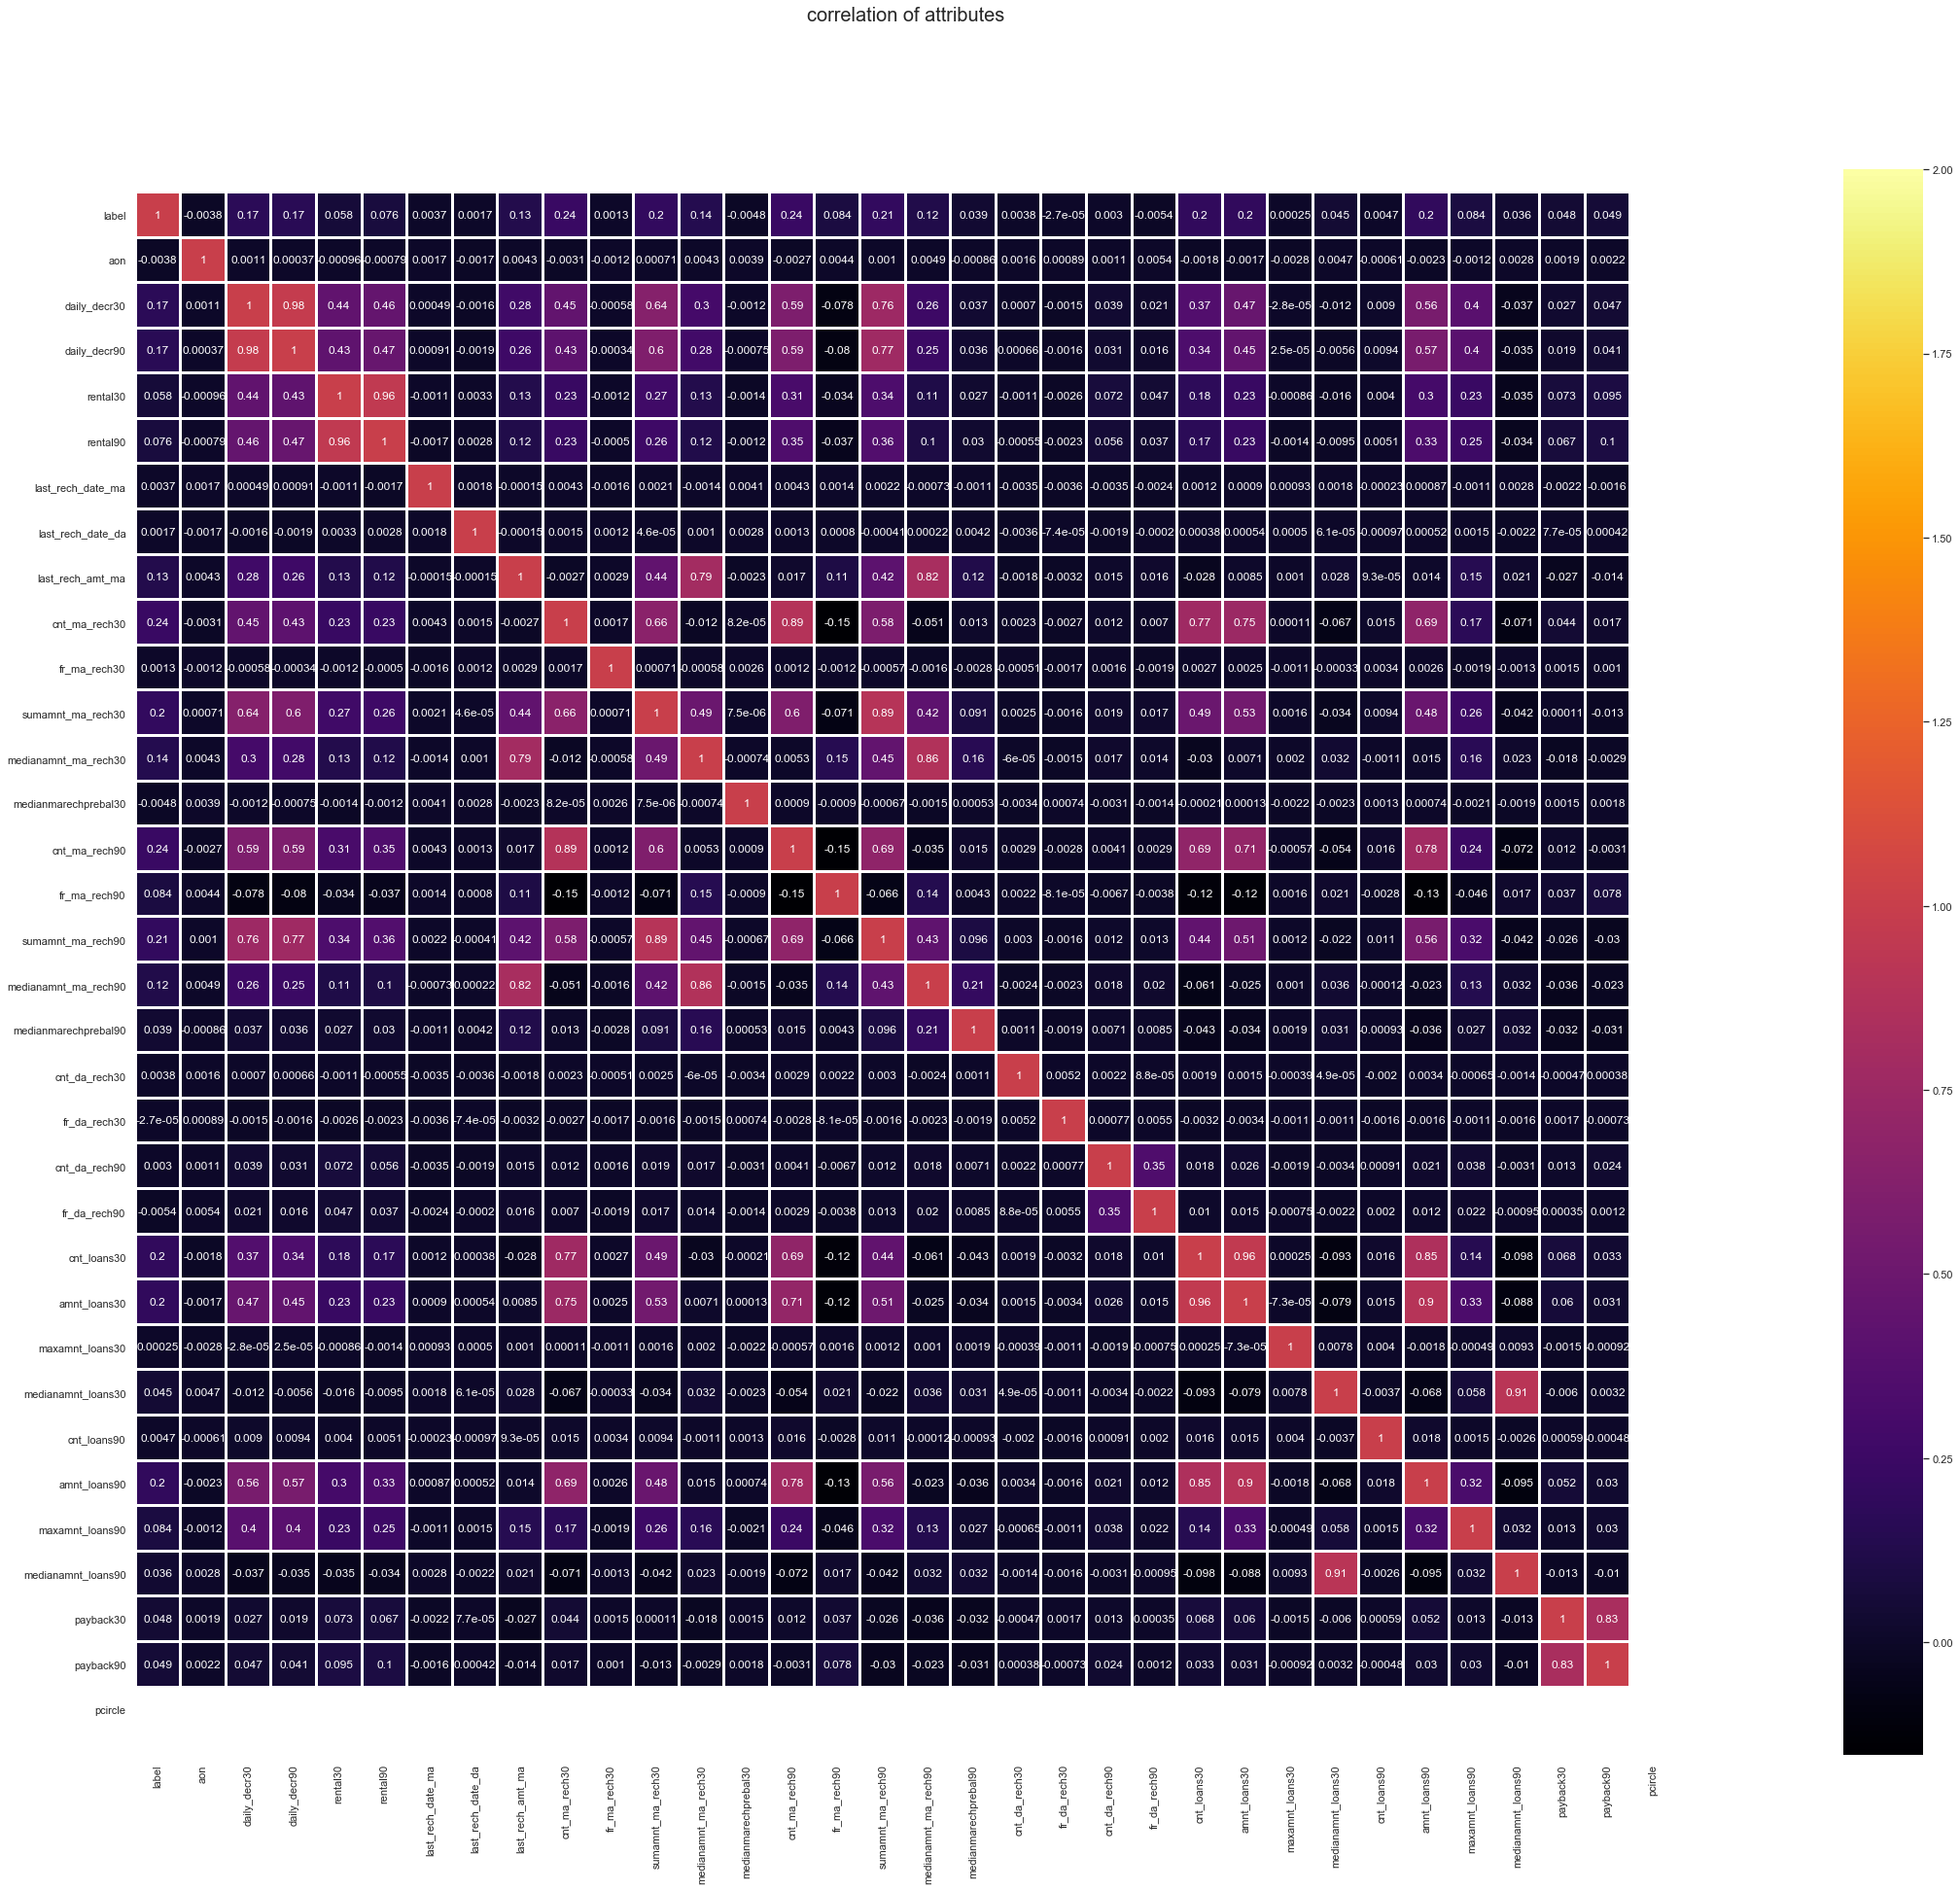

In [13]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(62,30))
plt.title('correlation of attributes',y=1.09, size=20)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for button and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

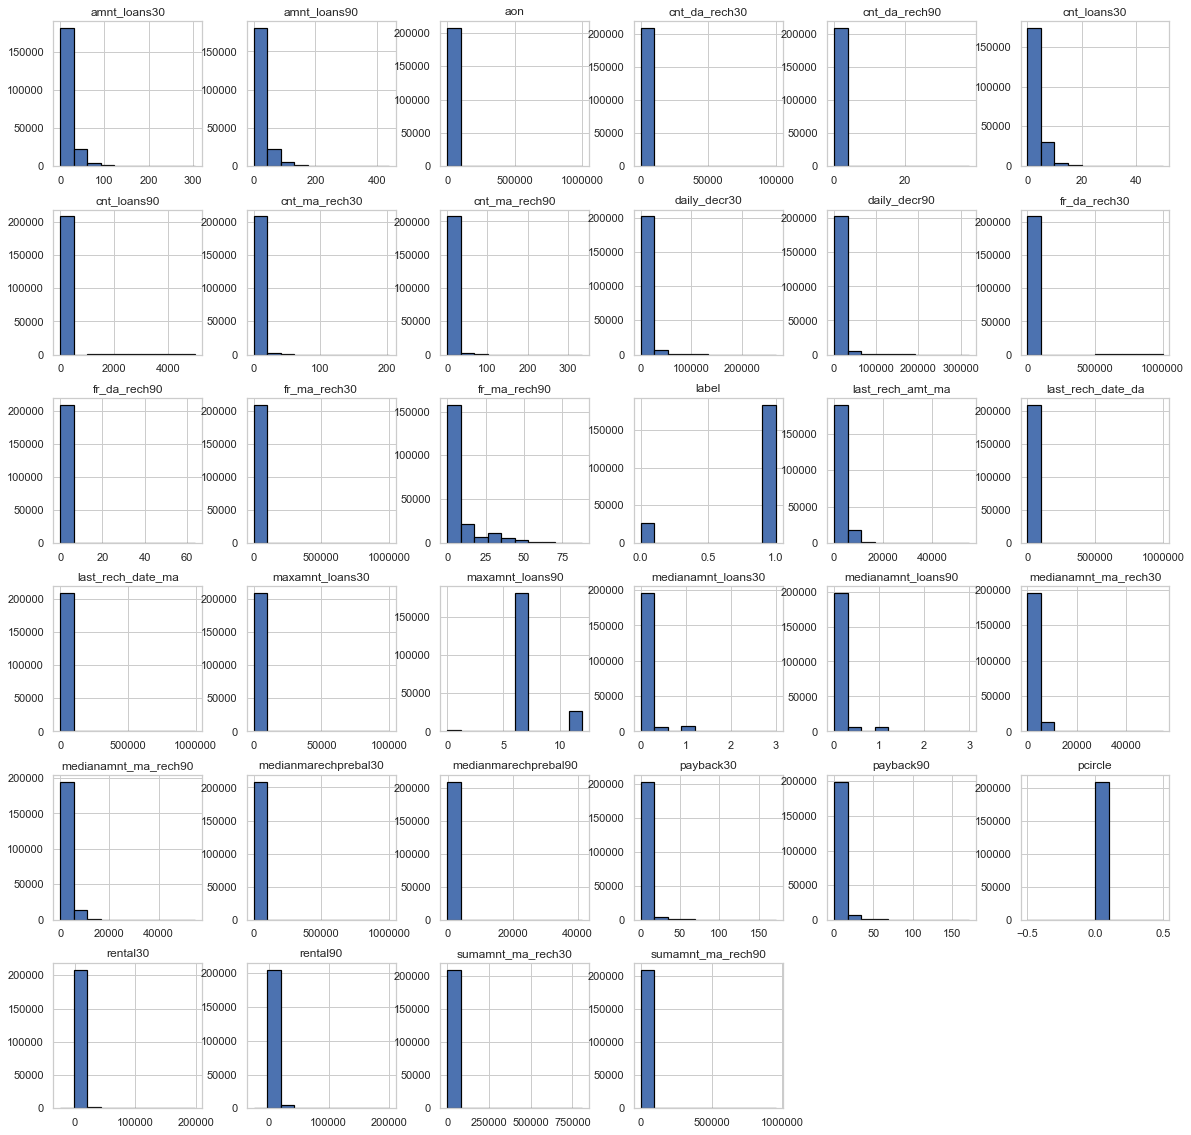

In [14]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [15]:
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
Credit_Amount_Sucess = df[(df['label'] != 0)]
Credit_Amount_Failure = df[(df['label'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(Credit_Amount_Failure), len(Credit_Amount_Sucess)), y = ['Credit_Amount_Sucess', 'Credit_Amount_Failure'], orientation = 'h', opacity = 0.8,marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of Credit_Payment_Status variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Credit_Amount_Failure', 'Credit_Amount_Sucess'], values = df['label'].value_counts(), 
               textfont=dict(size=15),opacity = 0.8, 
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Credit_Payment_Status variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# TestTrain Split

In [16]:
from sklearn.model_selection import train_test_split

# segregating the Target columns b/w variables X and Y
X = df.loc[:, df.columns != 'label'] 
Y = df['label']

# split into 70% train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=54)
X_train.shape,X_test.shape

((146715, 33), (62878, 33))

In [17]:
# Checking the Split of positive Target columns within Test\Train and Original Data
# Accordingly adjust the random_state value from split function to bring the best composition of data between Train and Test sets.

print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['label'] == 1]), (len(df.loc[df['label'] == 1])/len(df.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['label'] == 0]), (len(df.loc[df['label'] == 0])/len(df.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))

Original Target True Values    : 183431 (87.52%)
Original Target False Values   : 26162 (12.48%)

Training Target True Values    : 128446 (87.55%)
Training Target False Values   : 18269 (12.45%)

Test Target True Values        : 54985 (87.45%)
Test Target False Values       : 7893 (12.55%)


* No mojor class Imbalance noticed in the Test Train split while comparing with the actual data

# LOGISTIC REGRESSION

In [18]:
# Import Logistic Regression related libraries
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)

# Predict on test
Y_predict = model.predict(X_test)

In [19]:
# Checking the Model score
model_score = model.score(X_test, Y_test)
print(model_score)

0.8755208498998059


Logistic Regression Model Confusion Matrix


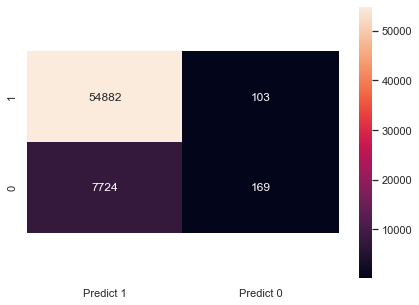

In [20]:
# Evaluating Model - Confusion Matrix.

print("Logistic Regression Model Confusion Matrix")
cm_lr=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm_lr, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

From the confusion Matrix (KNN =7) - True Positives are 54882 (rightly predited that the client subscribed for a term deposit) True Negatives are 169 (rightly predited that the client did not subscribe for a term deposit) False Positive(Type I Error) are 7724 (Predited that customer subscribed for a term deposit but they did not) False Negative(Type II Error) are 103 (Predited that the customer did not subscribe for a term deposit but they did)

In [21]:
# Model Evaluation by finiding various metrics
cm_lr = metrics.confusion_matrix(Y_test, Y_predict)
LR_a = (cm_lr[0,0] + cm_lr[1,1]) / (cm_lr[0,0] + cm_lr[0,1] + cm_lr[1,0] + cm_lr[1,1])
LR_p = cm_lr[1,1] / (cm_lr[1,1] + cm_lr[0,1])
LR_r = cm_lr[1,1] / (cm_lr[1,1] + cm_lr[1,0])
LR_f = (2 * LR_p * LR_r) / (LR_p + LR_r)

print("LR accuracy : ",round(LR_a,2))
print("LR precision: ",round(LR_p,2))
print("LR recall   : ",round(LR_r,2))
print("LR F1 score : ",round(LR_f,2))

LR accuracy :  0.88
LR precision:  0.88
LR recall   :  1.0
LR F1 score :  0.93


In [22]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': LR_a,'Precision': LR_p, 'Recall':LR_r, 'F1Score':LR_f})
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439



The Logistic Regression model developed can predict the results correct with 87% accuracy

In [23]:
# Model Evaluation by finiding various metrics
cm_knn = metrics.confusion_matrix(Y_test, Y_predict)
KNN_a = (cm_knn[0,0] + cm_knn[1,1]) / (cm_knn[0,0] + cm_knn[0,1] + cm_knn[1,0] + cm_knn[1,1])
KNN_p = cm_knn[1,1] / (cm_knn[1,1] + cm_knn[0,1])
KNN_r = cm_knn[1,1] / (cm_knn[1,1] + cm_knn[1,0])
KNN_f = (2 * KNN_p * KNN_r) / (KNN_p + KNN_r)

print("KNN accuracy : ",round(KNN_a,2))
print("KNN precision: ",round(KNN_p,2))
print("KNN recall   : ",round(KNN_r,2))
print("KNN F1 score : ",round(KNN_f,2))

KNN accuracy :  0.88
KNN precision:  0.88
KNN recall   :  1.0
KNN F1 score :  0.93


In [24]:
#Store the accuracy results for each model in a dataframe for final comparison
KNNResultsDf = pd.DataFrame({'Method':['K-NN'], 'Accuracy': KNN_a,'Precision': KNN_p, 'Recall':KNN_r, 'F1Score':KNN_f})
resultsDf = pd.concat([resultsDf, KNNResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439


The K-NN classifier with K value of 7 can predict the results correct with 87% accuracy. However, Logistic Regression model take an upper hand between them.

# NAIVE BAYES Algorithm

In [25]:

# Import Gaussian algorithm from Naive Bayes as our attributes are numerics

from sklearn.naive_bayes import GaussianNB 
NB_model = GaussianNB()                # Model Definition
NB_model.fit(X_train, Y_train.ravel()) # Model Fitment

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Performance of NB model with training data

NB_train_predict = NB_model.predict(X_train)
from sklearn import metrics # Checking Accurancy score
print("Model Accuracy on Train Data: {0:.4f}".format(metrics.accuracy_score(Y_train, NB_train_predict)))

Model Accuracy on Train Data: 0.5475


In [27]:
# Performance of PL model with Test data

NB_test_predict = NB_model.predict(X_test)
from sklearn import metrics # Checking Accurancy score
print("Model Accuracy on Test Data: {0:.4f}".format(metrics.accuracy_score(Y_test, NB_test_predict)))

Model Accuracy on Test Data: 0.5505


Naive Bayes Model Confusion Matrix


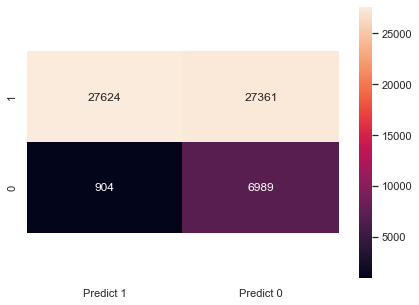

In [28]:
# Evaluating Model - Confusion Matrix.

print("Naive Bayes Model Confusion Matrix")
cm_nb=metrics.confusion_matrix(Y_test, NB_test_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm_nb, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [29]:
# Model Evaluation by finiding various metrics
cm_nb = metrics.confusion_matrix(Y_test, NB_test_predict)
NB_a = (cm_nb[0,0] + cm_nb[1,1]) / (cm_nb[0,0] + cm_nb[0,1] + cm_nb[1,0] + cm_nb[1,1])
NB_p = cm_nb[1,1] / (cm_nb[1,1] + cm_nb[0,1])
NB_r = cm_nb[1,1] / (cm_nb[1,1] + cm_nb[1,0])
NB_f = (2 * NB_p * NB_r) / (NB_p + NB_r)

print("NB accuracy : ",round(NB_a,2))
print("NB precision: ",round(NB_p,2))
print("NB recall   : ",round(NB_r,2))
print("NB F1 score : ",round(NB_f,2))

NB accuracy :  0.55
NB precision:  0.97
NB recall   :  0.5
NB F1 score :  0.66


In [30]:
#Store the accuracy results for each model in a dataframe for final comparison
NBResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'Accuracy': NB_a,'Precision': NB_p, 'Recall':NB_r, 'F1Score':NB_f})
resultsDf = pd.concat([resultsDf, NBResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439
0,Naive Bayes,0.550479,0.968312,0.502392,0.661550


The Naive Bayes classifier under performed with K-NN and Logistic Regression and had an accuracy of 55%

# DECISION TREE

In [31]:
# Importing the necessary libraries for Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree

# Using the gini method to find the split columns
DTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
DTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [32]:
# Decision Tree model scores on Test and Train data
print(DTree.score(X_train, Y_train))
print(DTree.score(X_test, Y_test))

0.9996455713458064
0.8655968701294571


As the Decision Tree is not regulated, it branched till the last and thus created over fit model as indicated by the Accuracy score(99.96%) on the Train data. We shall regularize the model by restricting the branch level to 3 and then validate the accuracy again

In [33]:
# Saving Decision Tree to DT.dot
train_char_label = ['No', 'Yes']
DT_File = open('DT.dot','w')
dot_data = tree.export_graphviz(DTree, out_file=DT_File, feature_names = list(X_train), class_names = list(train_char_label))
DT_File.close()

Not attempting to visualize the full Decision Tree as the data is hugh. Attempted to view the tree from http://webgraphviz.com/ but was not coming up and suspect that could be due to the hugh tree chart.

In [34]:
# Generating the Decision Tree model with regulated branching (3 level only)
DTree3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
DTree3.fit(X_train, Y_train)
print(DTree3.score(X_train, Y_train))
print(DTree3.score(X_test, Y_test))
Y_predict_DT = DTree3.predict(X_test)

0.902095900214702
0.9013486434046885


In [37]:

# Gini importance while generating the tree with 3 levels
print (pd.DataFrame(DTree3.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
aon                   0.000000
daily_decr30          0.000000
daily_decr90          0.709815
rental30              0.000000
rental90              0.041527
last_rech_date_ma     0.006489
last_rech_date_da     0.000000
last_rech_amt_ma      0.000000
cnt_ma_rech30         0.000000
fr_ma_rech30          0.000000
sumamnt_ma_rech30     0.000000
medianamnt_ma_rech30  0.000000
medianmarechprebal30  0.000000
cnt_ma_rech90         0.032642
fr_ma_rech90          0.000000
sumamnt_ma_rech90     0.209527
medianamnt_ma_rech90  0.000000
medianmarechprebal90  0.000000
cnt_da_rech30         0.000000
fr_da_rech30          0.000000
cnt_da_rech90         0.000000
fr_da_rech90          0.000000
cnt_loans30           0.000000
amnt_loans30          0.000000
maxamnt_loans30       0.000000
medianamnt_loans30    0.000000
cnt_loans90           0.000000
amnt_loans90          0.000000
maxamnt_loans90       0.000000
medianamnt_loans90    0.000000
payback30             0.000000
payback9

In [38]:

# Generating the Decision Tree model with regulated branching (5 level only)
DTree5 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
DTree5.fit(X_train, Y_train)
print(DTree5.score(X_train, Y_train))
print(DTree5.score(X_test, Y_test))
Y_predict_DT = DTree5.predict(X_test)

0.9046723238932625
0.9038614459747447


In [41]:
# Gini importance while generating the tree with 5 levels
print (pd.DataFrame(DTree5.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
aon                   0.000288
daily_decr30          0.033235
daily_decr90          0.666512
rental30              0.000160
rental90              0.037669
last_rech_date_ma     0.016701
last_rech_date_da     0.000000
last_rech_amt_ma      0.000000
cnt_ma_rech30         0.000000
fr_ma_rech30          0.000000
sumamnt_ma_rech30     0.001267
medianamnt_ma_rech30  0.000000
medianmarechprebal30  0.000000
cnt_ma_rech90         0.037991
fr_ma_rech90          0.000000
sumamnt_ma_rech90     0.189185
medianamnt_ma_rech90  0.000000
medianmarechprebal90  0.000000
cnt_da_rech30         0.000000
fr_da_rech30          0.000000
cnt_da_rech90         0.000000
fr_da_rech90          0.000000
cnt_loans30           0.000000
amnt_loans30          0.016992
maxamnt_loans30       0.000000
medianamnt_loans30    0.000000
cnt_loans90           0.000000
amnt_loans90          0.000000
maxamnt_loans90       0.000000
medianamnt_loans90    0.000000
payback30             0.000000
payback9

In [42]:
# Generating the Decision Tree model with regulated branching (7 level only)
DTree7 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=1)
DTree7.fit(X_train, Y_train)
print(DTree7.score(X_train, Y_train))
print(DTree7.score(X_test, Y_test))
Y_predict_DT = DTree7.predict(X_test)

0.9086255665746515
0.9065650943096154


In [43]:

# Gini importance while generating the tree with 7 levels
print (pd.DataFrame(DTree7.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
aon                   0.003238
daily_decr30          0.056753
daily_decr90          0.614084
rental30              0.002627
rental90              0.049196
last_rech_date_ma     0.021812
last_rech_date_da     0.001119
last_rech_amt_ma      0.000266
cnt_ma_rech30         0.000000
fr_ma_rech30          0.000000
sumamnt_ma_rech30     0.003060
medianamnt_ma_rech30  0.003670
medianmarechprebal30  0.001912
cnt_ma_rech90         0.033738
fr_ma_rech90          0.000298
sumamnt_ma_rech90     0.168259
medianamnt_ma_rech90  0.001853
medianmarechprebal90  0.008240
cnt_da_rech30         0.000000
fr_da_rech30          0.000000
cnt_da_rech90         0.000000
fr_da_rech90          0.000000
cnt_loans30           0.000000
amnt_loans30          0.015211
maxamnt_loans30       0.000579
medianamnt_loans30    0.000000
cnt_loans90           0.002680
amnt_loans90          0.005110
maxamnt_loans90       0.002068
medianamnt_loans90    0.000000
payback30             0.000000
payback9

Decision Tree Confusion Matrix


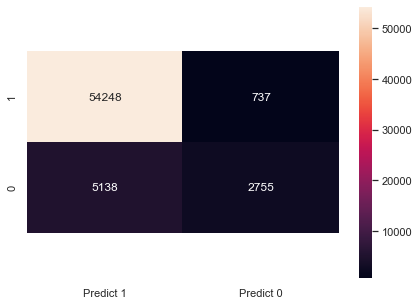

In [44]:
# Evaluating Model - Confusion Matrix.

print("Decision Tree Confusion Matrix")
cm_DT=metrics.confusion_matrix(Y_test, Y_predict_DT, labels=[1, 0])
df_cm = pd.DataFrame(cm_DT, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [45]:
# Model Evaluation by finiding various metrics
cm_DT = metrics.confusion_matrix(Y_test, Y_predict_DT)
DT_a = (cm_DT[0,0] + cm_DT[1,1]) / (cm_DT[0,0] + cm_DT[0,1] + cm_DT[1,0] + cm_DT[1,1])
DT_p = cm_DT[1,1] / (cm_DT[1,1] + cm_DT[0,1])
DT_r = cm_DT[1,1] / (cm_DT[1,1] + cm_DT[1,0])
DT_f = (2 * DT_p * DT_r) / (DT_p + DT_r)

print("DT accuracy : ",round(DT_a,2))
print("DT precision: ",round(DT_p,2))
print("DT recall   : ",round(DT_r,2))
print("DT F1 score : ",round(DT_f,2))

DT accuracy :  0.91
DT precision:  0.91
DT recall   :  0.99
DT F1 score :  0.95


In [46]:
#Store the accuracy results for each model in a dataframe for final comparison
DTResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': DT_a,'Precision': DT_p, 'Recall':DT_r, 'F1Score':DT_f})
resultsDf = pd.concat([resultsDf, DTResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439
0,Naive Bayes,0.550479,0.968312,0.502392,0.661550
0,Decision Tree,0.906565,0.913481,0.986596,0.948632


# Ensemble Learning - Random Forest

In [47]:
# Import the libraries for Random Forest Ensemble model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

In [48]:
# Model score check for Random Forest
Y_predict_RF = rfcl.predict(X_test)
print (accuracy_score(Y_test, Y_predict_RF))

0.911320334616241


Random Forest Ensemble Model Confusion Matrix


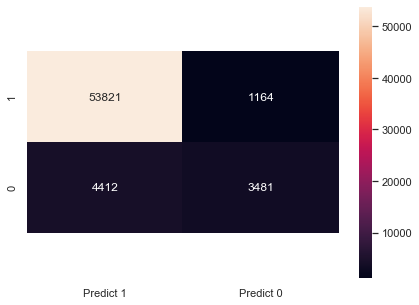

In [49]:
# Evaluating Model - Confusion Matrix.

print("Random Forest Ensemble Model Confusion Matrix")
cm_RF=metrics.confusion_matrix(Y_test, Y_predict_RF, labels=[1, 0])
df_cm = pd.DataFrame(cm_RF, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [50]:
# Model Evaluation by finiding various metrics
cm_RF = metrics.confusion_matrix(Y_test, Y_predict_RF)
RF_a = (cm_RF[0,0] + cm_RF[1,1]) / (cm_RF[0,0] + cm_RF[0,1] + cm_RF[1,0] + cm_RF[1,1])
RF_p = cm_RF[1,1] / (cm_RF[1,1] + cm_RF[0,1])
RF_r = cm_RF[1,1] / (cm_RF[1,1] + cm_RF[1,0])
RF_f = (2 * RF_p * RF_r) / (RF_p + RF_r)

print("RF accuracy : ",round(RF_a,2))
print("RF precision: ",round(RF_p,2))
print("RF recall   : ",round(RF_r,2))
print("RF F1 score : ",round(RF_f,2))

RF accuracy :  0.91
RF precision:  0.92
RF recall   :  0.98
RF F1 score :  0.95


In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
RFResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': RF_a,'Precision': RF_p, 'Recall':RF_r, 'F1Score':RF_f})
resultsDf = pd.concat([resultsDf, RFResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439
0,Naive Bayes,0.550479,0.968312,0.502392,0.661550
0,Decision Tree,0.906565,0.913481,0.986596,0.948632
0,Random Forest,0.911320,0.924235,0.978831,0.950750



Ensemble model - Random Forest showcased a better performance than the earlier champion-Decision tree with accuracy score of 91.2%

# Ensemble Learning - Adaptive Boosting Model

In [52]:
# Import the libraries for Adaboost Ensemble model
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=20)
Ada = Ada.fit(X_train, Y_train)

In [53]:
# Model score check for AdaBoost
Y_Predict_Ada =Ada.predict(X_test)
print (accuracy_score(Y_test, Y_Predict_Ada))

0.9013963548458921


Adaptive Boosting Ensemble Model Confusion Matrix


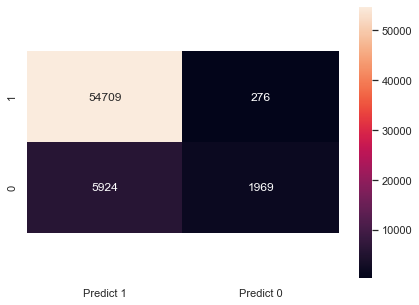

In [54]:
# Evaluating Model - Confusion Matrix.

print("Adaptive Boosting Ensemble Model Confusion Matrix")
cm_ADA=metrics.confusion_matrix(Y_test, Y_Predict_Ada, labels=[1, 0])
df_cm = pd.DataFrame(cm_ADA, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [55]:
# Model Evaluation by finiding various metrics
cm_ADA = metrics.confusion_matrix(Y_test, Y_Predict_Ada)
ADA_a = (cm_ADA[0,0] + cm_ADA[1,1]) / (cm_ADA[0,0] + cm_ADA[0,1] + cm_ADA[1,0] + cm_ADA[1,1])
ADA_p = cm_ADA[1,1] / (cm_ADA[1,1] + cm_ADA[0,1])
ADA_r = cm_ADA[1,1] / (cm_ADA[1,1] + cm_ADA[1,0])
ADA_f = (2 * ADA_p * ADA_r) / (ADA_p + ADA_r)

print("ADA accuracy : ",round(ADA_a,2))
print("ADA precision: ",round(ADA_p,2))
print("ADA recall   : ",round(ADA_r,2))
print("ADA F1 score : ",round(ADA_f,2))

ADA accuracy :  0.9
ADA precision:  0.9
ADA recall   :  0.99
ADA F1 score :  0.95


In [56]:
#Store the accuracy results for each model in a dataframe for final comparison
ADAResultsDf = pd.DataFrame({'Method':['Adaptive Boosting'], 'Accuracy': ADA_a,'Precision': ADA_p, 'Recall':ADA_r, 'F1Score':ADA_f})
resultsDf = pd.concat([resultsDf, ADAResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439
0,Naive Bayes,0.550479,0.968312,0.502392,0.661550
0,Decision Tree,0.906565,0.913481,0.986596,0.948632
0,Random Forest,0.911320,0.924235,0.978831,0.950750
0,Adaptive Boosting,0.901396,0.902297,0.994980,0.946375


# Ensemble Learning - Gradient Boosting Model

In [57]:
# Import the libraries for Gradiant Boosting Ensemble model
from sklearn.ensemble import GradientBoostingClassifier
GradBoost = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
GradBoost = GradBoost.fit(X_train, Y_train)

In [58]:
# Model score check for Gradiant Boost
Y_predict_GB = GradBoost.predict(X_test)
print (accuracy_score(Y_test, Y_predict_GB))

0.9060561722701104


Gradiant Boosting Ensemble Model Confusion Matrix


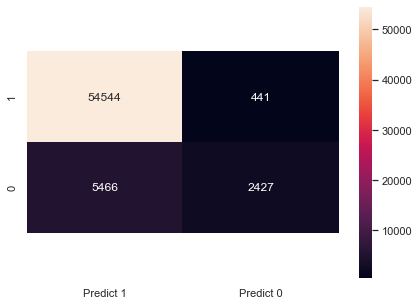

In [59]:
# Evaluating Model - Confusion Matrix.

print("Gradiant Boosting Ensemble Model Confusion Matrix")
cm_GR=metrics.confusion_matrix(Y_test, Y_predict_GB, labels=[1, 0])
df_cm = pd.DataFrame(cm_GR, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [60]:
# Model Evaluation by finiding various metrics
cm_GR = metrics.confusion_matrix(Y_test, Y_predict_GB)
GR_a = (cm_GR[0,0] + cm_GR[1,1]) / (cm_GR[0,0] + cm_GR[0,1] + cm_GR[1,0] + cm_GR[1,1])
GR_p = cm_GR[1,1] / (cm_GR[1,1] + cm_GR[0,1])
GR_r = cm_GR[1,1] / (cm_GR[1,1] + cm_GR[1,0])
GR_f = (2 * GR_p * GR_r) / (GR_p + GR_r)

print("GR accuracy : ",round(GR_a,2))
print("GR precision: ",round(GR_p,2))
print("GR recall   : ",round(GR_r,2))
print("GR F1 score : ",round(GR_f,2))

GR accuracy :  0.91
GR precision:  0.91
GR recall   :  0.99
GR F1 score :  0.95


In [61]:
#Store the accuracy results for each model in a dataframe for final comparison
GRResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'Accuracy': GR_a,'Precision': GR_p, 'Recall':GR_r, 'F1Score':GR_f})
resultsDf = pd.concat([resultsDf, GRResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439
0,Naive Bayes,0.550479,0.968312,0.502392,0.661550
0,Decision Tree,0.906565,0.913481,0.986596,0.948632
0,Random Forest,0.911320,0.924235,0.978831,0.950750
0,Adaptive Boosting,0.901396,0.902297,0.994980,0.946375
0,Gradient Boosting,0.906056,0.908915,0.991980,0.948633


# Ensemble Learning - Bagging Model

In [62]:
# Import the libraries for Bagging Ensemble model
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
Bag = Bag.fit(X_train, Y_train)

In [63]:
# Model score check for Bagging model
Y_predict_Bag = Bag.predict(X_test)
print (accuracy_score(Y_test, Y_predict_Bag))

0.9122904672540475


Bagging Ensemble Model Confusion Matrix


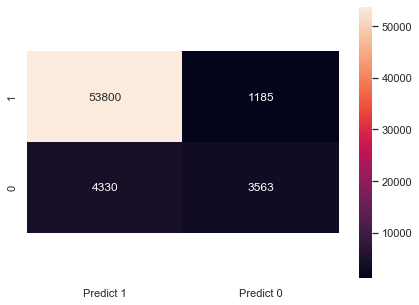

In [64]:
# Evaluating Model - Confusion Matrix.

print("Bagging Ensemble Model Confusion Matrix")
cm_bag=metrics.confusion_matrix(Y_test, Y_predict_Bag, labels=[1, 0])
df_cm = pd.DataFrame(cm_bag, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt = 'g')
# snippet to overcome the top and bottom row breaking cells (Matplotlib version specific issue)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [65]:
# Model Evaluation by finiding various metrics
cm_bag = metrics.confusion_matrix(Y_test, Y_predict_Bag)
Bag_a = (cm_bag[0,0] + cm_bag[1,1]) / (cm_bag[0,0] + cm_bag[0,1] + cm_bag[1,0] + cm_bag[1,1])
Bag_p = cm_bag[1,1] / (cm_bag[1,1] + cm_bag[0,1])
Bag_r = cm_bag[1,1] / (cm_bag[1,1] + cm_bag[1,0])
Bag_f = (2 * Bag_p * Bag_r) / (Bag_p + Bag_r)

print("Bag accuracy : ",round(Bag_a,2))
print("Bag precision: ",round(Bag_p,2))
print("Bag recall   : ",round(Bag_r,2))
print("Bag F1 score : ",round(Bag_f,2))


Bag accuracy :  0.91
Bag precision:  0.93
Bag recall   :  0.98
Bag F1 score :  0.95


In [66]:
#Store the accuracy results for each model in a dataframe for final comparison
BagResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': Bag_a,'Precision': Bag_p, 'Recall':Bag_r, 'F1Score':Bag_f})
resultsDf = pd.concat([resultsDf, BagResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'Precision', 'Recall', 'F1Score']]
resultsDf

,Method,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.875521,0.876625,0.998127,0.933439
0,K-NN,0.875521,0.876625,0.998127,0.933439
0,Naive Bayes,0.550479,0.968312,0.502392,0.661550
0,Decision Tree,0.906565,0.913481,0.986596,0.948632
0,Random Forest,0.911320,0.924235,0.978831,0.950750
0,Adaptive Boosting,0.901396,0.902297,0.994980,0.946375
0,Gradient Boosting,0.906056,0.908915,0.991980,0.948633
0,Bagging,0.912290,0.925512,0.978449,0.951244



Bagging Classifier and Random Forest Ensemble classifier almost performed same but Random Forest took a hair line lead with Bagging model having an accurancy of 91.2% against Random Forest with accuracy of 91.1%

# CONCLUSION

The classification goal is to predict if the client will subscribe (yes/no) a term Payment done during the campaign or not and on comparing all of the base Classifier models and the Ensemble model performances, Random Forest Ensemble model with collection of Decision trees and Bagging Ensemble had almost the same Accuracy scores (91.13 and 91.22 respectively). It looks like the Accuracy standpoint, both models had a tie to choose the best one. Evaluating the other performance measures like the F1 score which accounts both Precision and Recall indicate that Bagging performed well with score of 92.55 against 92.42 for Random Forest.